# Principal Component Analysis and Dimensionality Reduction of Cars Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [19]:
# Loading data & drop unnecessary columns
file_path = './dataset/auto-mpg.csv'
data = pd.read_csv(file_path, usecols=['mpg', 'horsepower'], nrows=200)
print(data)

      mpg  horsepower
0    18.0         130
1    15.0         165
2    18.0         150
3    16.0         150
4    17.0         140
..    ...         ...
195  29.0          52
196  24.5          60
197  29.0          70
198  33.0          53
199  20.0         100

[200 rows x 2 columns]


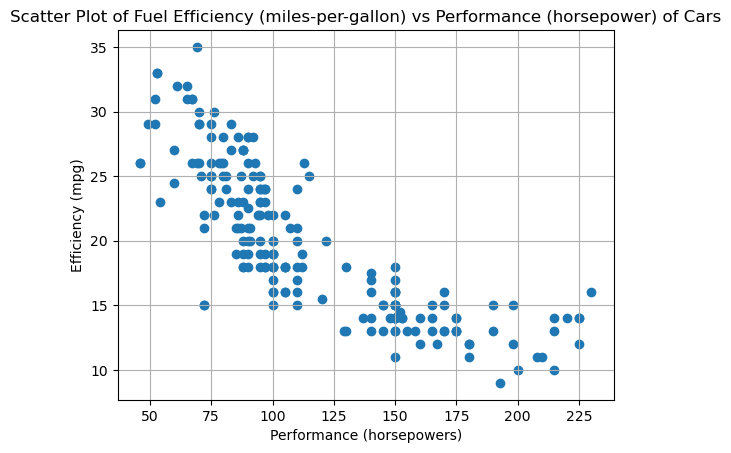

In [20]:
# This is how our first data looks like
plt.scatter(data['horsepower'], data['mpg'])
plt.title(f'Scatter Plot of Fuel Efficiency (miles-per-gallon) vs Performance (horsepower) of Cars')
plt.xlabel('Performance (horsepowers)')
plt.ylabel('Efficiency (mpg)')
plt.grid(True)
plt.show()

In [21]:
# Convert pandas dataframe to numpy array (matrix)
array_data = data.to_numpy()

### 1. Standardization

Using the original data, we standardize and center the data to normalize the different scales of data.Without standardization, variables with larger scales might dominate the principal components, and the results may be biased towards those variables. Also, it helps to improve numerical stability during the PCA computation. It helps avoid issues related to floating-point precision when dealing with variables of significantly different magnitudes.

The standardization can be done by this formula:
$$ x_{standard} = \dfrac {x - \bar x} {SD}   $$

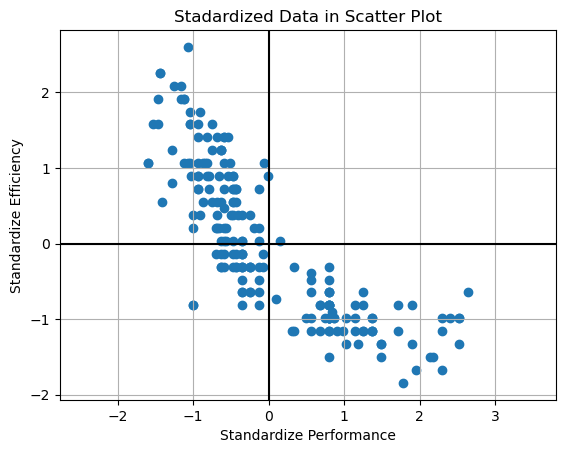

In [22]:
# Standardization and center data the data
array_data = preprocessing.scale(array_data)
plt.title(f'Stadardized Data in Scatter Plot')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.grid()
plt.axis('equal')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0])

In [24]:
# Data Fitting
pca = PCA(n_components=2, whiten=True)
pca.fit(array_data)

PCA(n_components=2, whiten=True)

### 2. Covariance Matrix Computation

The goal of this step is to determine whether each variable is related, as sometimes variables have a high degree of correlation due to overlapping information. To identify these relationships, it is necessary to compute the Covariance Matrix.

The Covariance Matrix is a symmetric p × p matrix (where p is the number of dimensions) that contains the covariances of all possible pairs of variables in the dataset. For this case, in a 2-dimensional dataset with variables x, and y, the Covariance Matrix would be a 2 × 2 matrix, and it is calculated as follows:

**From the calculation, we found that the data x and are <u>inversely correlated</u>**

In [25]:
print("Covariant Matrix:",pca.get_covariance())

Covariant Matrix: [[ 1.68516667 -1.65153631]
 [-1.65153631  1.68516667]]


### 3: Compute the Eigenvectors and Eigenvalues of the Covariance Matrix

Eigenvectors and Eigenvalues are calculated from the Covariance Matrix to determine the Principal Components of the data.

**Principal Components** are new variables created as linear combinations or mixtures of the original variables in the dataset. These combinations are uncorrelated, and the majority of the information within the original variables is squeezed or compressed into the first component. The concept is that, for example, in a 10-dimensional dataset, there are 10 principal components, but PCA (Principal Component Analysis) aims to put as much of the data variability as possible into the first component. Subsequently, the remaining maximum information is placed in the second component, and this process continues iteratively.

In [26]:
print("Component Vector (Eigenvector):",pca.components_)
print("Component Vector Weight (Eigenvalue):",pca.explained_variance_)

Component Vector (Eigenvector): [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Component Vector Weight (Eigenvalue): [1.82666444 0.18338581]


In [27]:
print("Captured Ratio:",sum(pca.explained_variance_ratio_))

Captured Ratio: 1.0


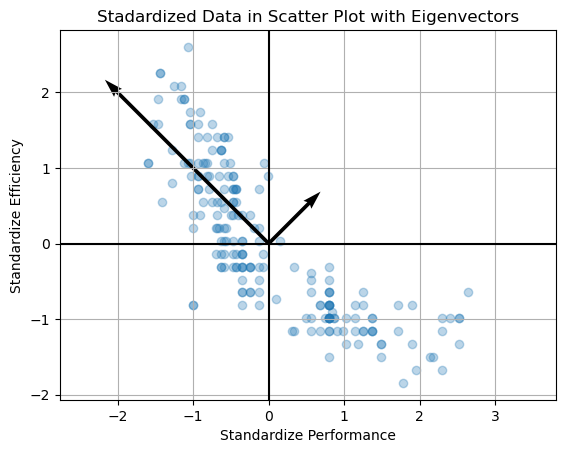

In [28]:
# plot data for eigenvector
plt.grid()
plt.title(f'Stadardized Data in Scatter Plot with Eigenvectors')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.axis('equal')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.3)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale= (5 * np.sqrt(pca.explained_variance_[1])))
plt.quiver(0,0,pca.components_[1,0],pca.components_[1,1], scale= (5 * np.sqrt(pca.explained_variance_[0])))

In [29]:
# Calculate accuracy for dimension reduction
pca_new = PCA(n_components=1)
pca_new.fit(array_data)
array_data_pca = pca_new.transform(array_data)
array_data_new = pca_new.inverse_transform(array_data_pca)

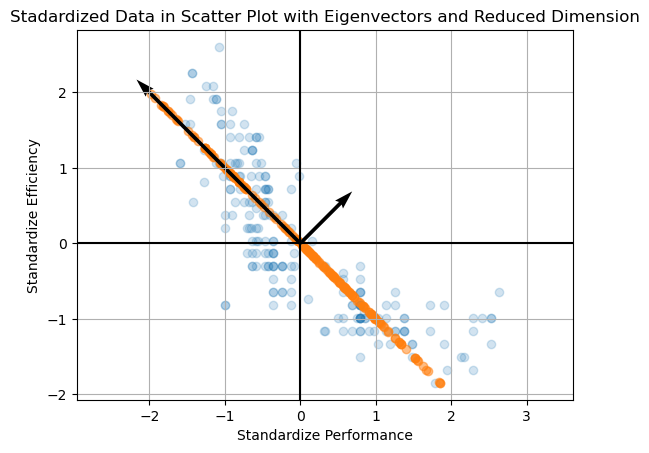

In [30]:
# plot all data
plt.title(f'Stadardized Data in Scatter Plot with Eigenvectors and Reduced Dimension')
plt.xlabel('Standardize Performance')
plt.ylabel('Standardize Efficiency')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(array_data[:, 1], array_data[:, 0], alpha=0.2)
plt.scatter(array_data_new[:, 0], array_data_new[:, 1], alpha=0.5)
plt.quiver(0,0,pca.components_[0,0],pca.components_[0,1], scale= (5 * np.sqrt(pca.explained_variance_[1])))
plt.quiver(0,0,pca.components_[1,0],pca.components_[1,1], scale= (5 * np.sqrt(pca.explained_variance_[0])))
plt.axis('equal')
plt.grid()

In [31]:
print("Captured Ratio After Reduction:",sum(pca_new.explained_variance_ratio_))

Captured Ratio After Reduction: 0.9087655594767273
